# Questão 1: Perceptron de Rosenblatt

## Problem


A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1 e mínimo de -0.1. 

## Objective
Formular este problema como um problema de classificação de 8 padrões e treinar uma rede Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. 

Para esta solução será utilizado o [conjunto de treinamento](input_x.txt)
e o [conjunto de validação](output_y.txt).

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


## Methodology
Almeja-se implementar uma rede neural baseada no Perceptron de Rosenblatt, o qual está ilustrado na Figura abaixo. 
- Pré-processamento dos dados;
- Divisão dos dados em treinamento e teste;
- Construção das camadas da rede neural;
- Treinamento;
- Teste;
- Matrix de Confusão;
- Gráficos de Acurácia e Loss.

  <p align="center">
    <img src="img/perceptron.jpg">
  </p>

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
X = []
y = []

X= np.loadtxt('./data_files/input_x.txt', dtype=float, delimiter=',', encoding='bytes')
y= np.loadtxt('./data_files/output_y.txt', dtype=float, delimiter=',', encoding='bytes')

In [3]:
print(X)

[[ 0.          0.         -0.07641626]
 [ 0.05774467 -0.08122808 -0.0943305 ]
 [ 0.03916657 -0.04673389  0.        ]
 ...
 [ 1.01616705  0.9949954   1.00249023]
 [ 1.0608926   1.          0.95538463]
 [ 1.          1.          1.        ]]


In [4]:
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

### Adding the output layer

In [9]:
ann.add(tf.keras.layers.Dense(units=8, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [10]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [11]:
#ann.fit(X_train, y_train, batch_size = 32, epochs = 600)
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=10, verbose=0)

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [12]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

### Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[13  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0]
 [ 0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  6]]


In [14]:
accuracy_score(y_test, y_pred)

1.0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


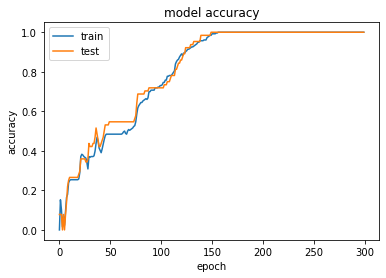

In [15]:
# summarize history for accuracy
print(history.history.keys())  
plt.figure(1)  

# summarize history for accuracy  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

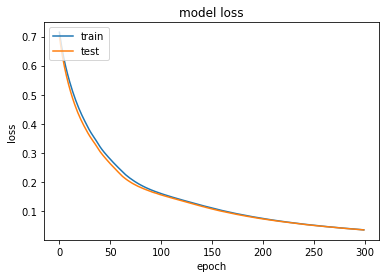

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()